#**Extreme Overfitting Example**

I'm going to simulate a set of random images and their associated labels. I want you to then fit a neural network to the random data. Finally, report how accurate the model is on the training data, and visualize training accuracy across epochs. 

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   5.000267e-01
std    2.887574e-01
min    1.814395e-07
25%    2.499166e-01
50%    5.000221e-01
75%    7.503404e-01
max    9.999997e-01

The first ten labels are [3. 8. 8. 2. 6. 6. 3. 9. 2. 4.]



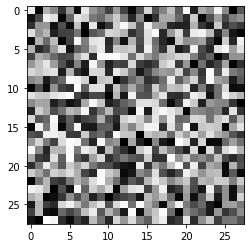

(5000, 784)
(5000, 1)


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1)) #-1 is a wildcard; it'll guess what shape I want, and by default give a vector back.
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them. 
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector. 
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Okay, now it's your turn: Use the simulated data and fit a sequential Keras model that has 512 units in the first layer, with a Relu activation, and then the output layer. 

In [11]:
# Setup your model topology here using the Sequential API.
model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
])

# Compile your model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit your model and store the training history in a variable (history) that you can query to plot the training loss, later. 
history = model.fit(train_images_random, train_labels_random, batch_size=20, epochs=30)

Epoch 1/30
334/334 [==============================] - 2s 6ms/step - loss: 2.4269 - accuracy: 0.0988
Epoch 2/30
334/334 [==============================] - 2s 6ms/step - loss: 2.3080 - accuracy: 0.1028
Epoch 3/30
334/334 [==============================] - 2s 5ms/step - loss: 2.3049 - accuracy: 0.1086
Epoch 4/30
334/334 [==============================] - 2s 6ms/step - loss: 2.2986 - accuracy: 0.1212
Epoch 5/30
334/334 [==============================] - 3s 8ms/step - loss: 2.2871 - accuracy: 0.1294
Epoch 6/30
334/334 [==============================] - 2s 6ms/step - loss: 2.2685 - accuracy: 0.1520
Epoch 7/30
334/334 [==============================] - 2s 6ms/step - loss: 2.2421 - accuracy: 0.1762
Epoch 8/30
334/334 [==============================] - 2s 5ms/step - loss: 2.2162 - accuracy: 0.1802
Epoch 9/30
334/334 [==============================] - 2s 5ms/step - loss: 2.1806 - accuracy: 0.2178
Epoch 10/30
334/334 [==============================] - 2s 5ms/step - loss: 2.1452 - accuracy: 0.2274

Okay, plot the training loss now... 

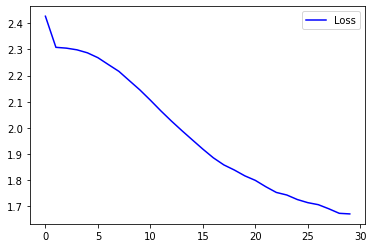

In [16]:
# Call plot commands here. 
plt.plot(range(0,30), history.history['loss'], c='b')
plt.legend(['Loss'])
plt.show()